
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt

In [3]:
single_image = x_train[0]

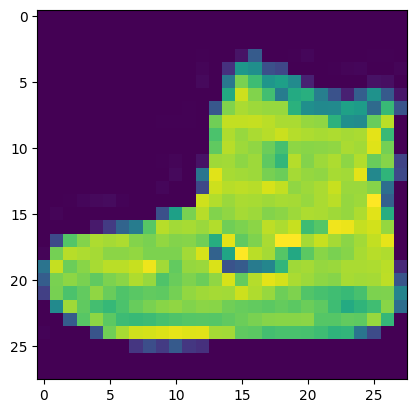

In [4]:
plt.imshow(single_image)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [7]:
single_image.max()

255

In [8]:
single_image.min()

0

In [9]:
x_train=x_train/255
x_test=x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [10]:
x_train=x_train.reshape(60000,28,28,1)

In [11]:
x_test=x_test.reshape(10000,28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(60000,)

In [16]:
y_test.shape

(10000,)

In [17]:
y_cat_train=to_categorical(y_train,10)

In [18]:
y_cat_test=to_categorical(y_test,10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [20]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

#Early_Stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [24]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7982 - loss: 0.5649 - val_accuracy: 0.8866 - val_loss: 0.3206
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8969 - loss: 0.2808 - val_accuracy: 0.8942 - val_loss: 0.2847
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9129 - loss: 0.2392 - val_accuracy: 0.8995 - val_loss: 0.2829
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9231 - loss: 0.2099 - val_accuracy: 0.9009 - val_loss: 0.2790
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9335 - loss: 0.1824 - val_accuracy: 0.9019 - val_loss: 0.3041
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9407 - loss: 0.1624 - val_accuracy: 0.9087 - val_loss: 0.2837
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9471 - loss: 0.1461 - val_accuracy: 0.9088 - val_loss: 0.2768
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9522 - loss: 0.131

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [34]:
import pandas as pd
import numpy as np

In [25]:
model.metrics_names

['loss', 'compile_metrics']

In [28]:
losses=pd.DataFrame(model.history.history)

In [30]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.852317,0.413035,0.8866,0.320557
1,0.899133,0.276930,0.8942,0.284705
2,0.913633,0.235553,0.8995,0.282902
3,0.924217,0.207555,0.9009,0.278996
4,0.932650,0.184800,0.9019,0.304109


<Axes: >

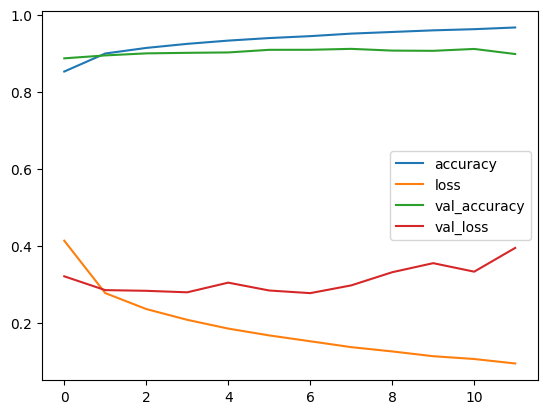

In [31]:
losses.plot()

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
predictions=np.argmax(model.predict(x_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.76      0.89      0.82      1000
           3       0.92      0.90      0.91      1000
           4       0.91      0.71      0.80      1000
           5       0.97      0.99      0.98      1000
           6       0.69      0.80      0.74      1000
           7       0.97      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[810,   1,  24,   7,   3,   0, 150,   0,   5,   0],
       [  2, 977,   4,  12,   2,   0,   2,   0,   1,   0],
       [ 11,   0, 889,   6,  19,   1,  73,   0,   1,   0],
       [ 24,   6,  26, 897,  13,   0,  34,   0,   0,   0],
       [  1,   1, 168,  29, 714,   1,  86,   0,   0,   0],
       [  0,   0,   0,   0,   0, 992,   0,   5,   0,   3],
       [ 84,   0,  57,  19,  33,   0, 801,   0,   6,   0],
       [  0,   0,   0,   0,   0,  19,   0, 958,   0,  23],
       [  4,   0,   2,   3,   2,   1,  10,   1, 977,   0],
       [  0,   0,   0,   0,   0,   8,   0,  28,   1, 963]])

In [38]:
import seaborn as sns

<Axes: >

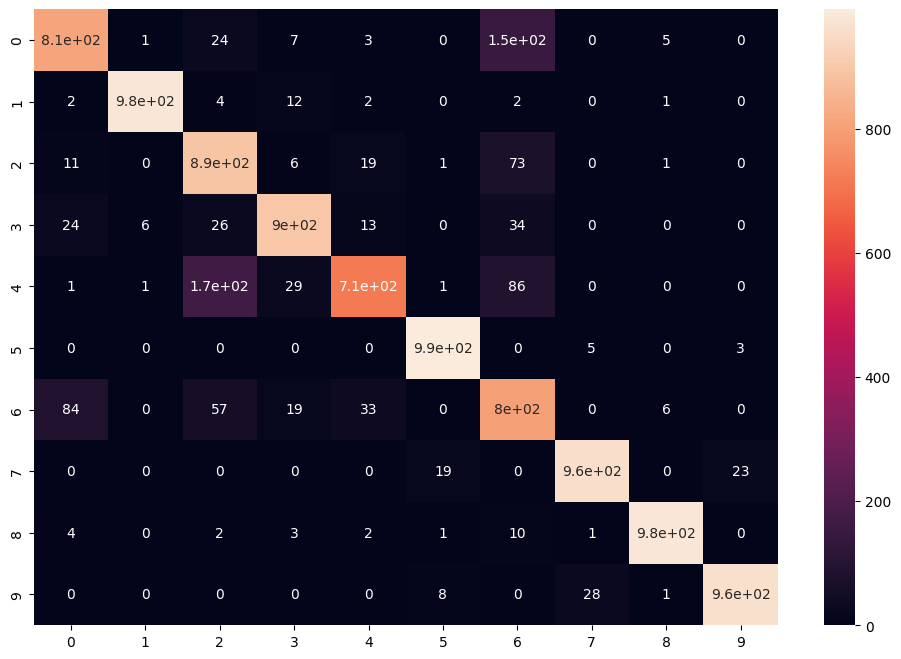

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Great Job!